# Uppgift 1

Vid planering av en forskningsstudie används simulerade slumptal $x_1,...,x_n$ från en viss slumpvariabel $X$, vilka beräknas med den så kallade inversmetoden enligt $x_k=6(1-(1-u_k)^{1/2})$, där u-värdena är rektangelfördelade slumptal på intervallet [0,1].  

## 1a) 
    Beräkna täthetsfunktionen för X

## 1b)
    Ta fram 600 slumptal från X-fördelningen och rita upp ett normerat histogram för dessa.  
    Jämför med resultatet i uppgift a)


## Beräknar täthetsfunktionen

Minsta möjliga värde för $u_k$ = 0, vilket ger minsta möjliga värde för $x_k$ = 0

Största möjliga värde för $u_k$ = 1, vilket ger största möjliga värde för $x_k$ = 6

Vår funktion: $x_k=6(1-(1-u_k)^{1/2})$

Löser ut $u_k$: $u_k = 1 - (1 - \frac{x_k}{6})^2$

Deriverar funktionen med avseende på $x_k$ för att få täthetsfunktionen $f_X$:

$\frac{du_k}{dx_k} = \frac{d}{dx_k}(1 - (1 - \frac{x_k}{6})^2)$

Inre derivata $U = (1 - \frac{x_k}{6})$

$\frac{du_k}{dx_k} = \frac{d}{dU}(1 - U^2) * \frac{d}{dx_k}(1 - \frac{x_k}{6}) = -2U * \frac{-1}{6} = -2(1 - \frac{x_k}{6}) * \frac{-1}{6} = \frac{1}{3} - \frac{x_k}{18}$ 


Täthetsfunktionen $f_X = \frac{1}{3}(\frac{x_k}{6}-1)$ för $0 < x_k < 6$

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


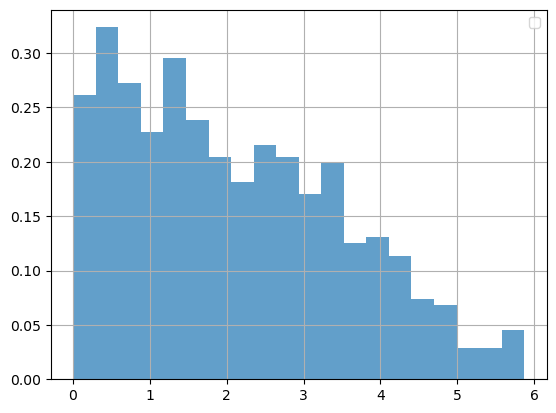

In [8]:
import numpy as np
import matplotlib.pyplot as plt

u_k = np.random.rand(600)
x_k = 6*(1 - (1 - u_k)**0.5)

plt.hist(x_k, bins=20, density=True, alpha=0.7)
plt.legend()
plt.grid(True)
plt.show()

# Uppgift 2

Maxwell-Boltzmannfördelningen beskriver hur hastigheterna hos partiklar i ett stort system, där partiklarna ständigt kolliderar med varandra, är fördelade. För att simulera denna fördelning i Python kan man använda scipy.stats.

Anropet maxwell.rvs(a, n) genererar n slumptal från Maxwellfördelningen, där a är en parameter.

Innan kommandot används måste modulen importeras med: 
from scipy.stats import maxwell 

## 2a) 
    Undersök med hjälp av simulering hur den typiska fördelningen för partikelhastighet i kvadrat
    ser ut. Använd några olika parametervärden för a för att se dess påverkan. 
   
   

In [15]:
from scipy.stats import maxwell 


a = float(input('Select a value for parameter a: '))
n=100
x = maxwell.rvs(a,n)

n = x**2 

print(f'The distribution of particle velocity squared: {n}')

Select a value for parameter a:  10


The distribution of particle velocity squared: 6241.32903530622


Observation utifrån det producerade värdet: Ett större värde på a producerar ett större fördelning. 

# Uppgift 3

## 3a)
    I ett experiment utsattes objekt med olika massor för samma (okända) kraft varvid
    accelerationen uppmättes.  Resultaten finns i datafilen constantforce.csv. Vi vill 
    analysera resultatet med hjälp av linjär regression. Vilken storhet bör uppfattas 
    som förklarande variabel och vilken bör uppfattas som responsvariabel? Varför? 
    Ta fram en punktskattning av kraften och konstruera ett lämpligt konfidensintervall.   

## 3b)
    Illustrera undersökningen grafiskt på lämpligt sätt. Beräkna förklaringsgraden
    och ge en tolkning.
     

1.4181688689279988 0.3015238305091199 7.67549621875
Punktskattningen av kraften är: 4.703339256911916
95.0% konfidensintervall för kraften ((4.530202767555247, 4.876475746268586))
förklaringsgraden är: 0.8690160380595818


<function matplotlib.pyplot.show(close=None, block=None)>

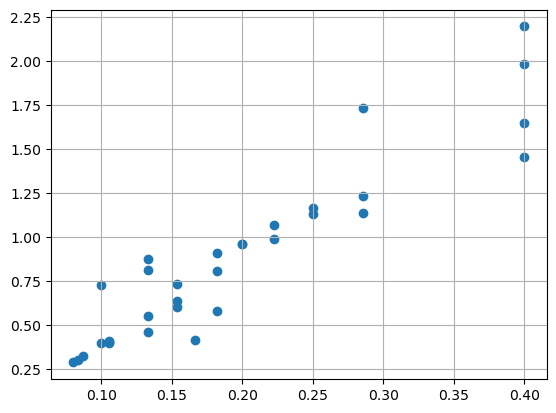

In [89]:
import numpy as np
import pandas as pd
import scipy.stats as st

data = np.genfromtxt('constantforce.csv', delimiter=',', skip_header=1)

#beräknande av den förklarande och repons- variabeln. 
massa = data[:,0]
x = 1/data[:,0]
y = data[:,1]
n = len(data)

#Beräkning av medelvärdet
x_sträck = np.mean(x)
y_sträck = np.mean(y)

s_xy = np.sum((x - x_sträck) * (y - y_sträck))
s_xx = np.sum((x -  x_sträck)**2)
s_yy = np.sum((y - y_sträck)**2)
print(s_xy, s_xx, s_yy)

b_stjärna = s_xy / s_xx
a_stjärna = y_sträck - b_stjärna * x_sträck

print(f'Punktskattningen av kraften är: {b_stjärna}')
s = np.sqrt((s_yy - s_xy**2/s_xx)/(n-2))

#konfidensintervall (I detta fall 0.95%
konfidensnivå = 0.95
alfa = 1 - konfidensnivå 
s = np.sqrt((s_yy - s_xy**2)/(n-2))


kon_inter_min = b_stjärna - s * np.sqrt(1/n + ((x_sträck)**2/s_xx))
kon_inter_plus = b_stjärna + s * np.sqrt(1/n + ((x_sträck)**2/s_xx))

print(f'{konfidensnivå*100}% konfidensintervall för kraften ({kon_inter_min, kon_inter_plus})')


förklaringsgraden = ((s_xy)**2)/(s_xx*s_yy)
print(f'förklaringsgraden är: {förklaringsgraden}')

plt.scatter(x,y, label ='data')
plt.grid(True)
plt.show

I experimentet så utsätts olika massor av samma kraft och sedan mättes accelerationen. Man kan då tänka att accelerationen av objektet är beroende av dens massa. Därmed så kommer x anses vara den förklarnande variabeln och y som respons variabeln, alltså så är det massan som *förklarar accelerationen, dvs respons variabeln.  

tolkningen av förklaringsgraden är att eftersom att det blev ett stor värde så var anpassningarna bra. 

# Uppgift 4
    Ladda upp datafilen IceCube40StringData.csv. Filen innehåller observationer av neutriner, 
    vilket är mycket små, nästan masslösa partiklar som sällan interagerar med materia.
    Observationerna är gjorda vid IceCube-observatoriet i Antarktis, där en stor mängd
    sensorer registrerar ankomsterna av dessa partiklar.

    Kolumnen MJD innehåller ankomsttider uttryckta i Modified Julian Date, ett astronomiskt
    tidssystem som anger antal dagar (och bråkdels dagar) sedan 17 november 1858. Detta format
    används ofta i vetenskapliga sammanhang för att undvika problem med vanliga datumformat.  

## 4a) 
    Använd kolumnen MJD för att beräkna tidsmellanrummen mellan registrerade neutrinoankomster.           
    Utifrån dessa mellanankomsttider ska du ta fram grundläggande beskrivande statistik: 
    medelvärde, ett lämpligt spridningsmått (t.ex. standardavvikelse), samt 
    variationskoefficienten (dvs standardavvikelse dividerat med medelvärde)

## 4b)
    Undersök statistiskt/grafiskt om det är rimligt att uppfatta mellanankomsttiderna som
    oberoende, exponentialfördelade slumpvariabler. Använd därvid momentmetoden för
    att skatta exponentialfördelningens intensitet. Beskriv kortfattat vad som kan tala för 
    eller emot den föreslagna modellen.  

In [ ]:
data = np.loadtxt('IceCube40StringData.csv', delimiter=',')
MJD = data[:,8]
tidsmellanrummen = np.abs(np.diff(MJD))


#Meldevärde
antal = len(tidsmellanrummen)
summa = np.sum(tidsmellanrummen)

medelvärdet = summa / antal

print(f'Medelvärden för tidsmellanrummen är: {round(medelvärdet, 2)}')


#Standardavvikelse
Lambda = 1 / medelvärdet

varians = 1 / Lambda**2
standardavvikelse = np.sqrt(varians)

print(f'Standardavvikelsen är: {round(standardavvikelse, 2)}')


#Variationskoefficienten
variationskoefficienten = standardavvikelse / abs(medelvärdet)

print(f'Variationskoefficienten är: {round(variationskoefficienten, 2)}')



In [ ]:

#plottar graf histogram
plt.hist(tidsmellanrummen, bins=50, density=True, alpha=0.6, color='g')
plt.xlim(-0.05, 0.25)
plt.xlabel('Tidsmellanrum (dagar)')
plt.ylabel('Frekvens (normaliserad)')
plt.title('Histogram över tidsmellanrum')
plt.grid(True)
plt.show()


Histogrammet ger en visuell indikation att mellanankomstiderna är exponentialfördelade slumpvariabler. Sedan har även skattningen $\hat{\lambda}$ beräknats fenom momentmetoden:

Medelvärdet visade sig bli $\bar{x} = 0.03$.

Det teoretiska väntevärdet för exponentialfördelning är: $E(X) = \frac{1}{\lambda}$

Enligt momentmetoden får vi att $\bar{x} = E(X)$ vilket ger oss $\bar{x} = \frac{1}{\lambda}$

Löser sedan ut $\lambda$ och får därmed vår skattning $\hat{\lambda} = \frac{1}{\bar{x}}$

Detta resultat visar att vår skattning av lambda ger samma väntevärde som i våra uträkningar.


I detta fall så är det rimligt att neutrinerna ses som oberoende slumpvariabler, då de inte påverkar varandra då mätnignarna togs. Eftersom att dessa masslösa partiklar sällan interagerar med materia kan man se den händelsen som poissonfördelnad, men nu när vi uppskattar mellanankomsttiderna (alltså tiden från att en neutrin interagerar till en annan) kommer dessa att ha en exponentialfördelning. Därför är det ett rimligt antagande vi har gjort. Men, om mellanankomsttiderna skulle ha påverkats av en yttre källa så skulle resutlatet påverkas signifikant, och därmed hade en sådan exponentialfördelning inte varit lika givande och på sådant sätt kan en fördelning som denna vara bristande.  

Vi kan se att vårt antagande om att mellanankomsttiderna var exponentialfördelade var en god gissning, då detta stämmer väl överrens med det histogram vi har plottat. 